<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [2]:
import itertools
import numpy as npy
import matplotlib.pyplot as plot
from matplotlib.ticker import NullFormatter
import pandas as pandas
import numpy as npy
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [4]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-09-18 12:56:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-09-18 12:56:22 (215 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)

### Convert to date time object


In [9]:
df['due_date'] = pandas.to_datetime(df['due_date'])
df['effective_date'] = pandas.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [10]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [11]:
# notice: installing seaborn might takes a few minutes
# !pip install seaborn - seaborn is already installed

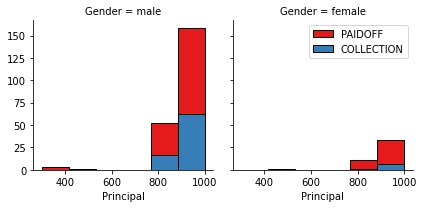

In [12]:
import seaborn as sns

bins = npy.linspace(df.Principal.min(), df.Principal.max(), 7)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plot.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plot.show()

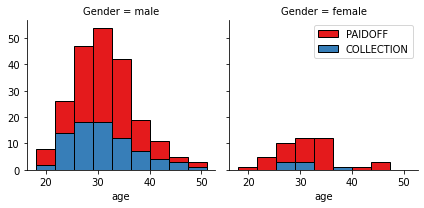

In [14]:
bins = npy.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plot.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plot.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


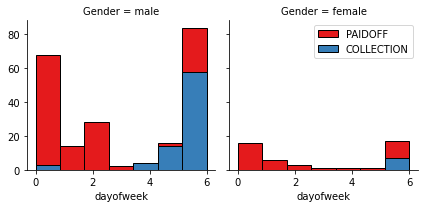

In [15]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = npy.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plot.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plot.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [16]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [20]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [21]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pandas.concat([Feature,pandas.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [22]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables? <br>
Our labels for X are: Principal	terms	age	Gender	weekend	Bechalor	High School or Below	college


In [23]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.<br>
You should use the following algorithms:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
#---
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [28]:
from sklearn import metrics
#---
yhat = neigh.predict(X_test)
yhat[0:5]
#---
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.7


In [31]:
k3 = 3
#Train Model and Predict  
neigh3 = KNeighborsClassifier(n_neighbors = k3).fit(X_train,y_train)
print("Neigh for k3 = ", neigh3)

Neigh for k3 =  KNeighborsClassifier(n_neighbors=3)


In [33]:
yhat3 = neigh3.predict(X_test)
yhat3[0:5]
print(yhat3[0:5])
#---
print("Train set Accuracy for neigh3: ", metrics.accuracy_score(y_train, neigh3.predict(X_train)))
print("Test set Accuracy for neigh3: ", metrics.accuracy_score(y_test, yhat3))

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Train set Accuracy for neigh3:  0.8333333333333334
Test set Accuracy for neigh3:  0.7428571428571429


In [34]:
k5 = 5
#Train Model and Predict  
neigh5 = KNeighborsClassifier(n_neighbors = k5).fit(X_train,y_train)
print("Neigh for k5 = ", neigh5)
#---
yhat5 = neigh5.predict(X_test)
yhat5[0:5]
print(yhat5[0:5])
#---
print("Train set Accuracy for neigh5: ", metrics.accuracy_score(y_train, neigh5.predict(X_train)))
print("Test set Accuracy for neigh5: ", metrics.accuracy_score(y_test, yhat5))

Neigh for k5 =  KNeighborsClassifier()
['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Train set Accuracy for neigh5:  0.8188405797101449
Test set Accuracy for neigh5:  0.7428571428571429


#### After doing for K = 4, 3 and 5, I will use a general formula to test the accuracy for the first 11 ks (k=1 to k=11):

In [37]:
Ks = 12
mean_acc = npy.zeros((Ks-1))
std_acc = npy.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neighN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatN=neighN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatN)

    
    std_acc[n-1]=npy.std(yhatN==y_test)/npy.sqrt(yhatN.shape[0])

mean_acc

array([0.64285714, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.8       , 0.75714286, 0.74285714, 0.68571429,
       0.71428571])

## Resp:
### So, as we can see, the best K is 8. Because it brings the bigger accuracy (Test accuracy for k=8 is 0.8)

# Decision Tree


Read: As the dataset is already preprocessed, we can go on with the Decision Tree training and modeling

In [109]:
# As decision trees don't handle cathegorical variables we need to convert them

In [94]:
Feature2df = df[['Principal','terms','age','education','Gender', 'dayofweek', 'weekend']]
Feature2df = pandas.concat([Feature2df,pandas.get_dummies(df['education'])], axis=1)
Feature2df.drop(['education'], axis = 1,inplace=True)

Feature2df[0:5]

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,3,0,0,1,0,0
1,1000,30,33,1,3,0,1,0,0,0
2,1000,15,27,0,3,0,0,0,0,1
3,1000,30,28,1,4,1,0,0,0,1
4,1000,30,29,0,4,1,0,0,0,1


In [101]:
Ydt = df['loan_status']
Ydt[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [108]:
# Setting up the decision tree
from sklearn.model_selection import train_test_split

X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(Feature2df, Ydt, test_size=0.2, random_state=4)
print('X_trainset is :\n', X_trainset[0:3])
print('X_testset is :\n', X_testset[0:3])
print('Y_trainset is :\n', Y_trainset[0:3])
print('Y_testset is :\n', Y_testset[0:3])

X_trainset is :
      Principal  terms  age  Gender  dayofweek  weekend  Bechalor  \
188       1000     15   35       0          0        0         0   
299       1000     30   26       0          6        1         0   
239       1000     30   31       0          2        0         0   

     High School or Below  Master or Above  college  
188                     0                0        1  
299                     1                0        0  
239                     0                0        1  
X_testset is :
      Principal  terms  age  Gender  dayofweek  weekend  Bechalor  \
63        1000     30   30       0          6        1         0   
34         800     15   30       0          6        1         0   
186       1000     15   31       0          0        0         0   

     High School or Below  Master or Above  college  
63                      1                0        0  
34                      0                0        1  
186                     1                0 

In [111]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(Y_trainset.shape))
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(Y_testset.shape))

Shape of X training set (276, 10) &  Size of Y training set (276,)
Shape of X testing set (70, 10) &  Size of Y testing set (70,)


### Modeling

In [129]:
from sklearn.tree import DecisionTreeClassifier
# Let's create a payLoan tree
payLoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
payLoanTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Next, we will fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> y_train</b>

In [130]:
payLoanTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### Prediction

In [131]:
predTree = payLoanTree.predict(X_testset)
print(predTree[2:8])
print(Y_testset[2:8])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION']
186       PAIDOFF
146       PAIDOFF
130       PAIDOFF
178       PAIDOFF
334    COLLECTION
14        PAIDOFF
Name: loan_status, dtype: object


### Evaluation

In [132]:
# Let's import metrics from sklearn and check the accuracy of our model.
from sklearn import metrics
# ----
print("DecisionTree's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTree's Accuracy:  0.7714285714285715


In [117]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py39hf3d152e_0         155 KB  conda-forge
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         181 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_1
  python_abi         conda-forge/linux-64::python_abi-3.9-2_cp39

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main::certifi-2022.6.15-py39h06a~ --> conda-forge::certifi-2022.6.15-py39hf

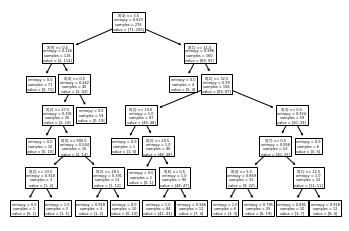

In [133]:
from sklearn.datasets import load_iris
from sklearn import tree

tree.plot_tree(payLoanTree)
plot.show()

## Resp:
### That is an average accuracy for Decision Tree method with depth = 6 ( 0.7714). <br>K-means was  higher (0.8 for K=8)

# Support Vector Machine


In [63]:
# to use SVM we need to import some more libraries
import scipy.optimize as opt
import pylab as pyl

In [140]:
Feature2df.dtypes
# Feature2df is ready to be used as X in SVM, as it has just numerical values

Principal               int64
terms                   int64
age                     int64
Gender                  int64
dayofweek               int64
weekend                 int64
Bechalor                uint8
High School or Below    uint8
Master or Above         uint8
college                 uint8
dtype: object

In [141]:
Xsvm_df = Feature2df
Xsvm_df.dtypes

Principal               int64
terms                   int64
age                     int64
Gender                  int64
dayofweek               int64
weekend                 int64
Bechalor                uint8
High School or Below    uint8
Master or Above         uint8
college                 uint8
dtype: object

In [142]:
Xsvm = npy.asarray(Xsvm_df)
Xsvm[0:5]

array([[1000,   30,   45,    0,    3,    0,    0,    1,    0,    0],
       [1000,   30,   33,    1,    3,    0,    1,    0,    0,    0],
       [1000,   15,   27,    0,    3,    0,    0,    0,    0,    1],
       [1000,   30,   28,    1,    4,    1,    0,    0,    0,    1],
       [1000,   30,   29,    0,    4,    1,    0,    0,    0,    1]])

In [148]:
Ysvmdt = Ydt
Ysvmdt[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [151]:
Ysvm = npy.asarray(Ysvmdt)
Ysvm [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Train/Test dataset

In [152]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split( Xsvm, Ysvm, test_size=0.2, random_state=4)
print ('Train set:', X_trainS.shape,  y_trainS.shape)
print ('Test set:', X_testS.shape,  y_testS.shape)

Train set: (276, 10) (276,)
Test set: (70, 10) (70,)


In [153]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_trainS, y_trainS) 

SVC()

After being fitted, the model can then be used to predict new values:

In [154]:
yhatSVM = clf.predict(X_testS)
yhatSVM [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Evaluation

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [158]:
from sklearn.metrics import f1_score
f1_score(y_testS, yhatSVM, average='weighted')

0.6914285714285714

In [163]:
from sklearn.metrics import jaccard_score
jaccard_score(y_testS, yhatSVM,pos_label="PAIDOFF")

0.7857142857142857

# Logistic Regression


# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
